In [1]:
!pip install easyocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.6 MB/s eta 0:00:00


In [2]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import pandas as pd

In [ ]:
exception = [6,] '8 1939 08 2 PU 4'

In [3]:
datatest = pd.read_csv('/content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set/DataTest.csv', index_col = 0, sep = ';')
datatest.head()

,Name of File
0,DataTest1.png
1,DataTest2.png
2,DataTest3.png
3,DataTest4.png
4,DataTest5.png


In [ ]:
b = ['ad', '232']
"".join(b)

'ad232'

In [ ]:
def detect_images(image_path):
  reader = easyocr.Reader(['en'])
  results = reader.readtext(image_path,paragraph="False")
  text = []
  for result in results:
    text.append(result[1])

  return ''.join(text)

In [ ]:
datatest['result'] = datatest['Name of File'].apply(lambda x: detect_images('/content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set_highreso/' + x))

In [ ]:
datatest.head(20)

,Name of File,result
0,DataTest1.png,AD : 703L DE
1,DataTest2.png,8653
2,DataTest3.png,B 16 TB 07 0
3,DataTest4.png,B 166T1KZ 0620
4,DataTest5.png,An 3772 . ABE OD 22
5,DataTest6.png,
6,DataTest7.png,1 106L TFR
7,DataTest8.png,8 1395 TJH 1d
8,DataTest9.png,0270 RFD
9,DataTest10.png,B 1736 BYH H


In [ ]:
import re
def format_license_plate(text):
        # Remove additional numbers separated by spaces
    text = re.sub(r'\b\d{1,2} \d{1,2}\b', '', text)

    # Change '8' at the beginning to 'B'
    if text.startswith('8'):
        text = 'B' + text[1:]

    # Extract the region code (alphabet at the beginning)
    region_code = re.search(r'[A-Z]+', text)

    # Extract the numeric part (up to 4 digits)
    numeric_part = re.search(r'\d{1,4}', text)

    # Extract the letter part (up to 3 letters)
    letter_part = re.search(r'[A-Z]{1,3}$', text)

    # Format the license plate
    license_plate = ''
    if region_code:
        license_plate += region_code.group()
    if numeric_part:
        license_plate += numeric_part.group()
    if letter_part:
        license_plate += letter_part.group()

    return license_plate.strip()

In [ ]:
datatest['final_result'] = datatest['result'].apply(format_license_plate)
datatest.head(10)

,Name of File,result,final_result
0,DataTest1.png,AD : 703L DE,AD703DE
1,DataTest2.png,8653,B653
2,DataTest3.png,B 16 TB 07 0,B16
3,DataTest4.png,B 166T1KZ 0620,B166
4,DataTest5.png,An 3772 . ABE OD 22,A3772
5,DataTest6.png,,
6,DataTest7.png,1 106L TFR,L1TFR
7,DataTest8.png,8 1395 TJH 1d,B1395
8,DataTest9.png,0270 RFD,RFD0270RFD
9,DataTest10.png,B 1736 BYH H,B1736H


# For 1 Image

In [ ]:
# 24, , height_ths = 0.5, width_ths = 1, slope_ths = 0.1, ycenter_ths = 0.3

In [4]:
characters = '1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [106]:
IMAGE_PATH = '/content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set_highreso/DataTest4.png'
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH,paragraph="False",allowlist = characters, add_margin = 0.1, low_text = 0.4, rotation_info = [0,10,20, 45], min_size = 20)
result

[[[[296, 125], [1245, 125], [1245, 358], [296, 358]], 'B 1661TKZ D 4 10']]

In [6]:
text = detect_images(IMAGE_PATH)
text

SyntaxError: ignored

In [7]:
len(result)

2

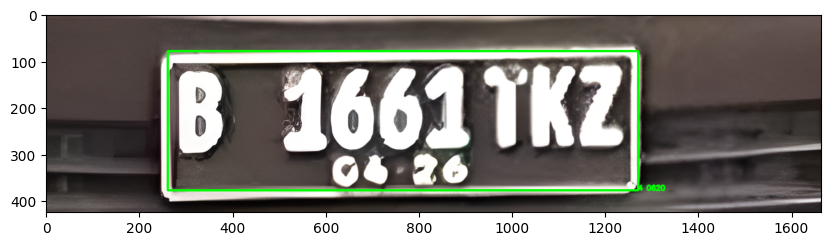

In [105]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,bottom_right, font, 0.5,(0,255,0),2,cv2.LINE_AA)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()